# Generating plots for different algorithms

In [1]:
from stable_baselines3 import PPO, DQN, A2C, SAC
import numpy as np
import pandas as pd
from meal_planning_environment import MaxNutritionEnv, HeuristicEnv, GPTOnlyEnv, RLHFEnv
from meal_planning_environment import run_with_learning_algorithm
from dietkit import load_ingredient, load_menu, load_diet

import os 
import time


log_dir = f"./tmp/gym/{time.strftime('%Y%m%d-%H%M%S')}"
os.makedirs(log_dir, exist_ok=False)

2023-04-23 15:05:40.899223: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Initialize dietkit

In [3]:
all_ingredients = load_ingredient(sample_language = 'eng')
meal_dict = load_menu(ingredients = all_ingredients, sample_language = 'eng')
example_mealplans = load_diet(menus = meal_dict, num_loads = 100, sample_language = 'eng', sample_name = 'ML')

possible_meals = np.array(list(meal_dict.keys()))
meal_categories = np.array([meal.category if isinstance(meal.category, str) else meal.category[0] for meal in meal_dict.values()])
nutrition_data = pd.DataFrame([meal.nutrition for meal in meal_dict.values()], index=possible_meals)

display(possible_meals)
display(nutrition_data)

array(['S watermelon punch (without milks)', 'Dried persimmon',
       'S kyogo grape (100g)', ..., 'Green onion kimchi',
       'Pickled paprika', 'empty'], dtype='<U72')

,Energy,Protein,Fat,Carbohydrate,Total Dietary,Calcium,Iron,Sodium,Vitamin A,Vitamin B1 (Thiamine),Vitamin B2 (Rivoflavin),Vitamin C,Linoleic Acid,Alpha-Linolenic Acid
S watermelon punch (without milks),55.00,0.7900,0.05000,13.8180,0.200,7.200,0.18600,0.600,71.083333,0.024000,0.03000,0.0000,14.2500,2.9300
Dried persimmon,76.50,0.5820,0.04800,20.5830,3.360,6.300,0.19200,0.900,13.725000,0.003000,0.06720,1.5330,0.0000,8.6010
S kyogo grape (100g),61.00,0.4300,0.04000,16.3800,0.400,4.000,0.17000,1.000,2.166667,0.026000,0.04700,0.1300,11.8900,6.0900
S dried persimmon,85.60,0.7720,0.03200,22.9800,3.400,5.600,0.24800,0.400,9.533333,0.003600,0.09720,1.0680,0.0000,5.0440
S fruit punch,101.05,3.6700,3.36450,14.8900,0.790,117.650,0.19850,36.000,91.166667,0.040350,0.19110,1.8925,86.6605,10.6925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ponytail radish kimchi,10.25,0.5050,0.05000,1.9725,0.775,10.500,0.16750,173.000,5.541667,0.003250,0.01900,0.4125,19.7050,9.4775
Kohlrabi watery kimchi,5.50,0.2900,0.01250,1.2900,0.600,10.500,0.06750,1.750,0.250000,0.203750,0.00875,0.0000,1.9650,5.1100
Green onion kimchi,12.25,0.6250,0.14500,2.1275,1.150,15.000,0.18250,163.750,26.854167,0.012750,0.02850,0.5550,79.8050,17.1425
Pickled paprika,7.94,0.2017,0.03005,1.9859,0.348,1.675,0.08145,67.204,4.850000,0.003675,0.02709,24.2820,12.4483,6.5448


## Initialize MealPlanningEnv
Choose from the following environments:
1. MaxNutritionEnv
2. HeuristicEnv
3. GPTOnlyEnv
4. RLHFEnv

In [4]:
num_meals = 21
max_env = MaxNutritionEnv(possible_meals=possible_meals, meal_categories=meal_categories, nutrition_data=nutrition_data, num_meals=num_meals)
heuristic_env = HeuristicEnv(possible_meals=possible_meals, meal_categories=meal_categories, nutrition_data=nutrition_data, num_meals=num_meals)

# Test PPO on HeuristicEnv

Using cpu device
Wrapping the env in a DummyVecEnv.
Initial Results
Step: 21
Chosen Meal: S seaweed veggie porridge
Chosen Meal Category: Soup (snack)
Meal History: ['Pan-fried cuttlefish and kimchi' 'Perilla seed tofu soup'
 'Braised king oyster mushroom' 'Seasoned winter cabbage in soy paste'
 'Veggie rice ball' 'Mussel daikon soup'
 'Stir-fried beef brisket and cabbage'
 'Mixed buckwheat noodles with sprouts' 'Beef rice noodles'
 'Fruit salad (yoghurt dressing)' 'S sweet potato tofu porridge'
 'Curried rice with saesongyi mushroom'
 'Stir-fried chicken breast and perilla leaves' 'Cucumber omelette'
 'Fried tofu cabbage soup' 'S watermelon punch' 'S cabbage porridge'
 'Cabbage salad (strawberry dressing)'
 'Stir-fried tuna and kimchi with rice' 'Stir-fried pork chops'
 'S seaweed veggie porridge']
Category History: ['Pancake' 'Soup' 'Braised' 'Salad' 'Combo meal rice' 'Soup' 'Stir-fried'
 'Noodles' 'Noodles' 'Salad' 'Soup (snack)' 'Combo meal rice' 'Stir-fried'
 'Stir-fried' 'Soup' '

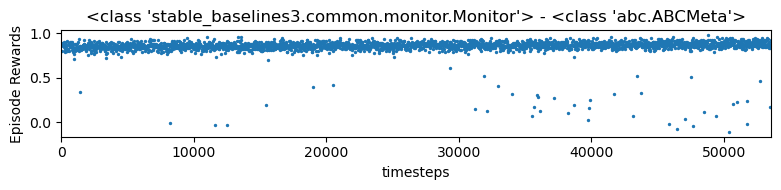

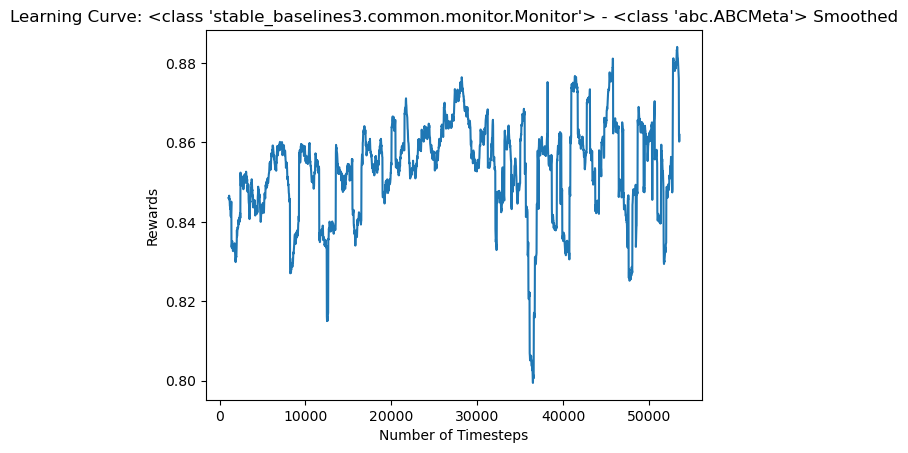

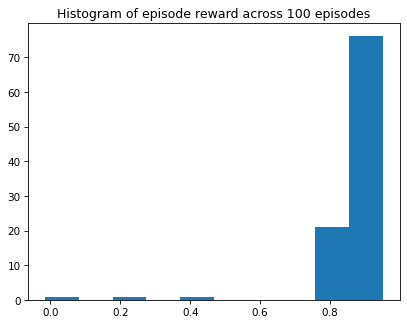

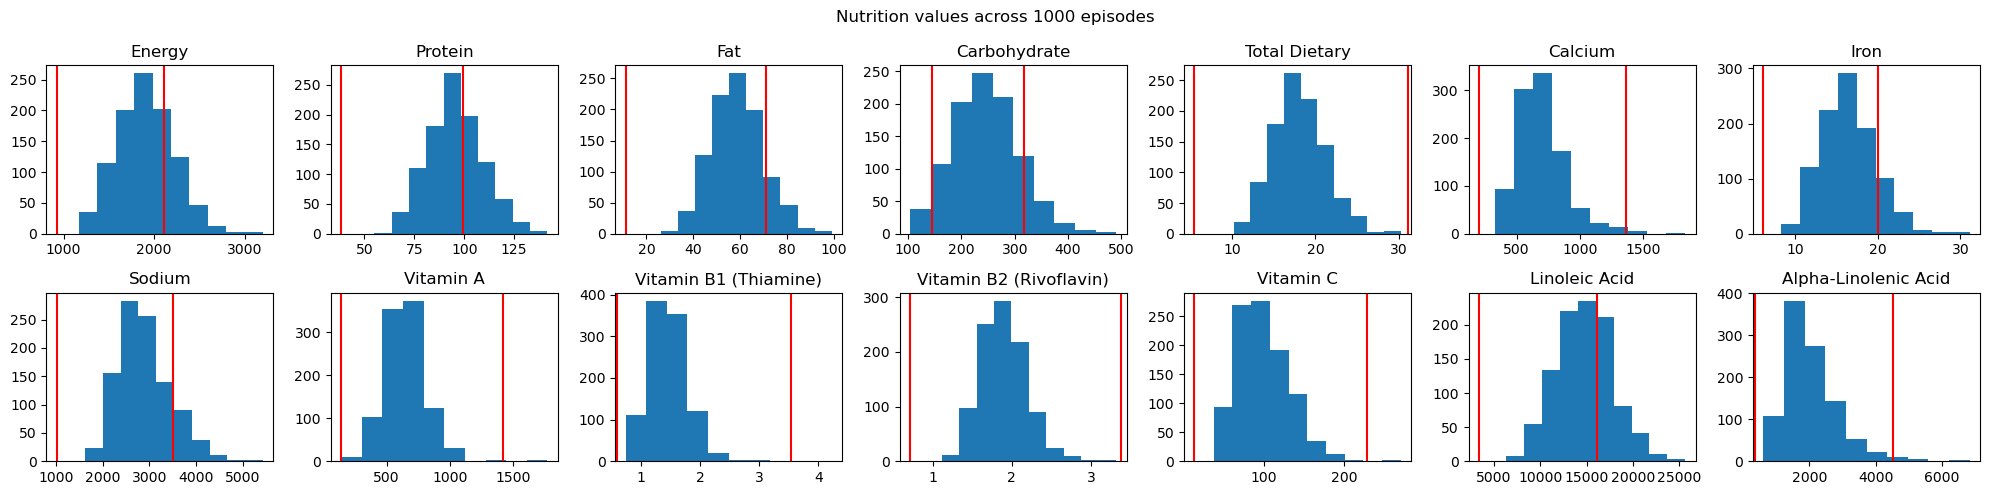

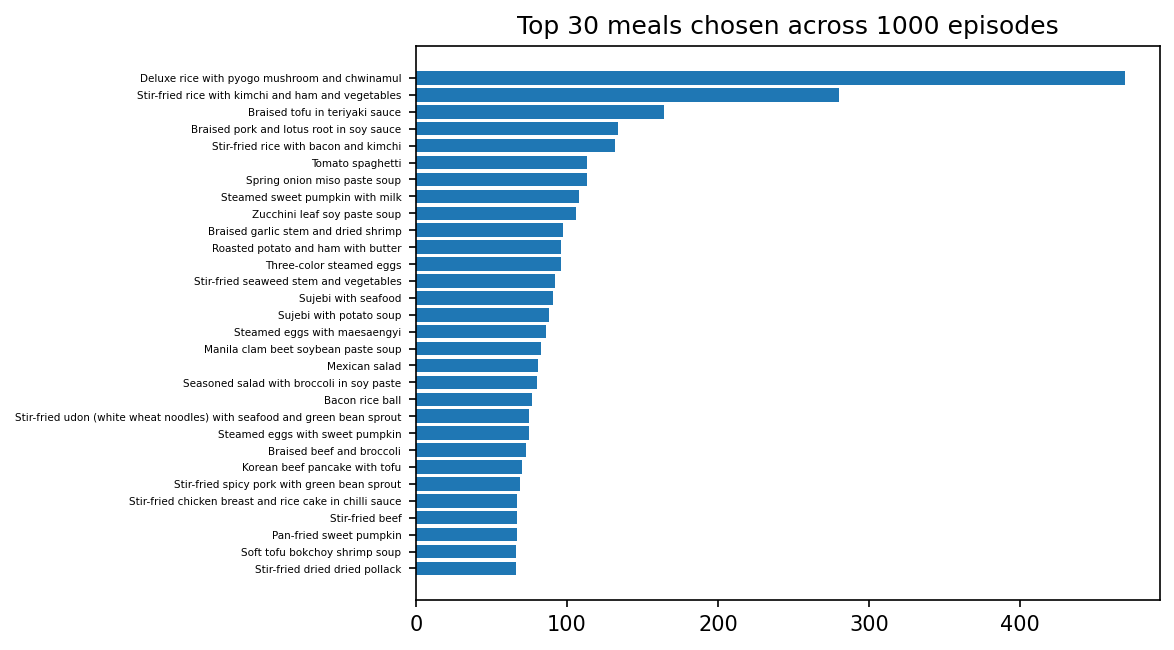

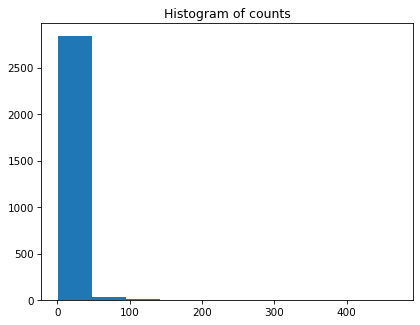

(<stable_baselines3.ppo.ppo.PPO at 0x7f7968a3fee0>,
 <Monitor<HeuristicEnv instance>>)

In [5]:
run_with_learning_algorithm(PPO, heuristic_env, 50000, log_dir, num_meals=21, seed=0)

### Test A2C on MaxNutritionEnv

Using cpu device
Wrapping the env in a DummyVecEnv.
Initial Results
Step: 21
Chosen Meal: S seaweed veggie porridge
Chosen Meal Category: Soup (snack)
Meal History: ['Pan-fried cuttlefish and kimchi' 'Perilla seed tofu soup'
 'Braised king oyster mushroom' 'Seasoned winter cabbage in soy paste'
 'Veggie rice ball' 'Mussel daikon soup'
 'Stir-fried beef brisket and cabbage'
 'Mixed buckwheat noodles with sprouts' 'Beef rice noodles'
 'Fruit salad (yoghurt dressing)' 'S sweet potato tofu porridge'
 'Curried rice with saesongyi mushroom'
 'Stir-fried chicken breast and perilla leaves' 'Cucumber omelette'
 'Fried tofu cabbage soup' 'S watermelon punch' 'S cabbage porridge'
 'Cabbage salad (strawberry dressing)'
 'Stir-fried tuna and kimchi with rice' 'Stir-fried pork chops'
 'S seaweed veggie porridge']
Category History: ['Pancake' 'Soup' 'Braised' 'Salad' 'Combo meal rice' 'Soup' 'Stir-fried'
 'Noodles' 'Noodles' 'Salad' 'Soup (snack)' 'Combo meal rice' 'Stir-fried'
 'Stir-fried' 'Soup' '

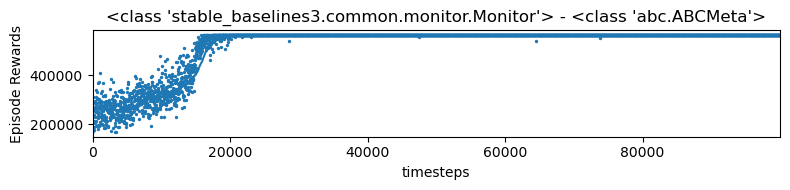

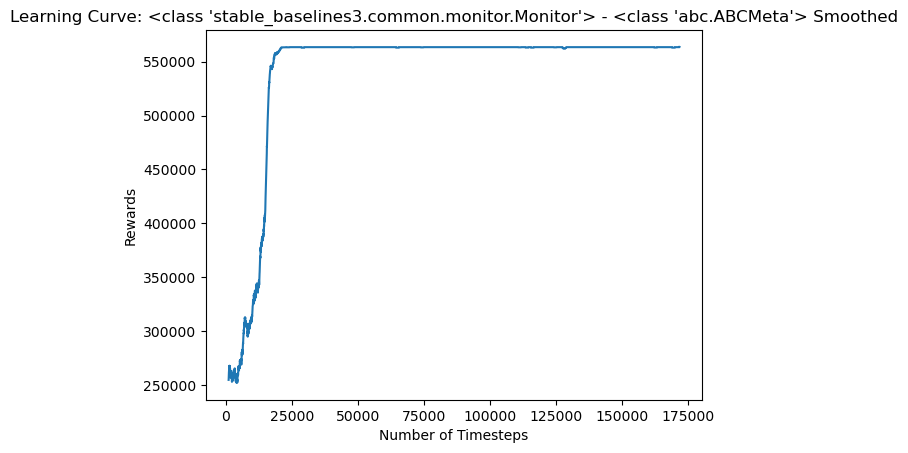

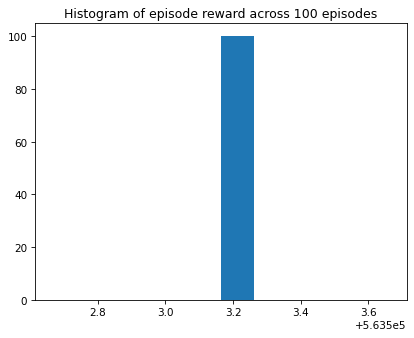

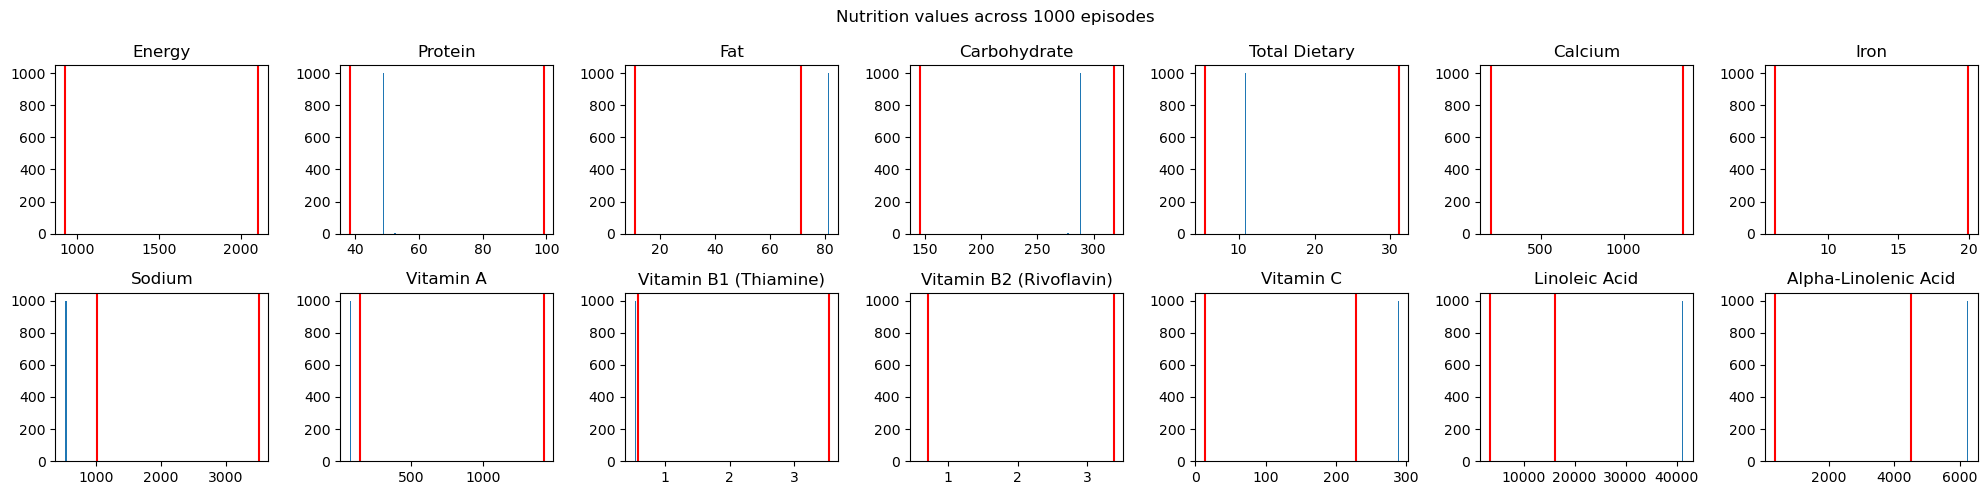

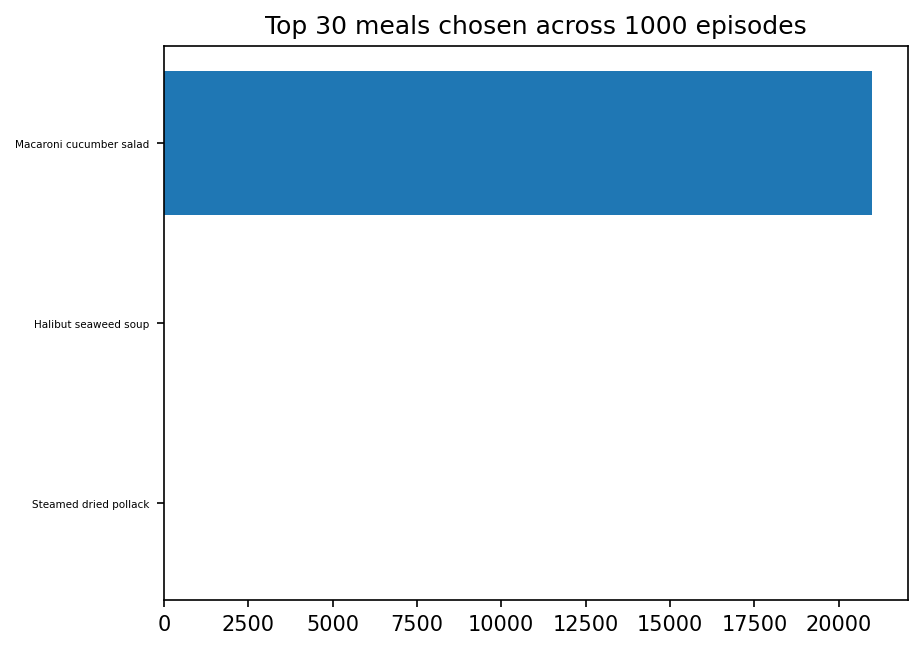

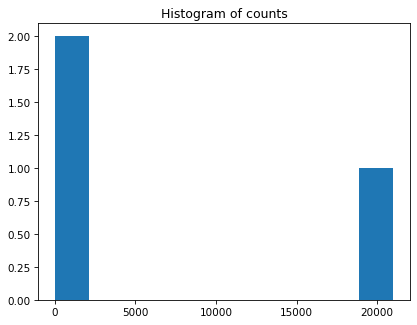

(<stable_baselines3.a2c.a2c.A2C at 0x7f9b6552ff10>,
 <Monitor<MaxNutritionEnv instance>>)

In [4]:
run_with_learning_algorithm(A2C, max_env, 50000, log_dir, num_meals=21, seed=0)

### Test DQN

Using cpu device
Wrapping the env in a DummyVecEnv.
Initial Results
Step: 21
Chosen Meal: Grilled mackerel in curry
Chosen Meal Category: Grilled
Meal History: ['Stir-fried boneless pork and kimchi'
 'Stir-fried boneless pork and kimchi'
 'Stir-fried boneless pork and kimchi'
 'Stir-fried boneless pork and kimchi'
 'Stir-fried boneless pork and kimchi'
 'Stir-fried boneless pork and kimchi'
 'Stir-fried boneless pork and kimchi'
 'Stir-fried boneless pork and kimchi'
 'Stir-fried boneless pork and kimchi'
 'Stir-fried boneless pork and kimchi'
 'Stir-fried boneless pork and kimchi'
 'Stir-fried boneless pork and kimchi'
 'Stir-fried boneless pork and kimchi' 'Grilled mackerel in curry'
 'Stir-fried boneless pork and kimchi'
 'Stir-fried boneless pork and kimchi'
 'Stir-fried boneless pork and kimchi'
 'Stir-fried boneless pork and kimchi' 'Taro soup'
 'Grilled mackerel in curry' 'Grilled mackerel in curry']
Category History: ['Stir-fried' 'Stir-fried' 'Stir-fried' 'Stir-fried' 'Stir-fr

/Users/lucasrosenblatt/opt/miniconda3/envs/new_rl/lib/python3.10/site-packages/stable_baselines3/common/buffers.py:564: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 3.26GB > 2.69GB
  warnings.warn(


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21       |
|    ep_rew_mean      | 2.61e+05 |
|    exploration_rate | 0.936    |
| time/               |          |
|    episodes         | 32       |
|    fps              | 3328     |
|    time_elapsed     | 0        |
|    total_timesteps  | 672      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21       |
|    ep_rew_mean      | 2.58e+05 |
|    exploration_rate | 0.928    |
| time/               |          |
|    episodes         | 36       |
|    fps              | 3442     |
|    time_elapsed     | 0        |
|    total_timesteps  | 756      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21       |
|    ep_rew_mean      | 2.54e+05 |
|    exploration_rate | 0.92     |
| time/               |          |
|    episodes       

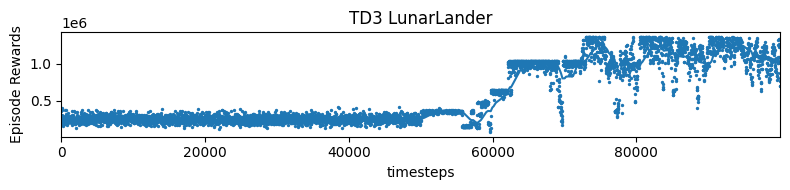

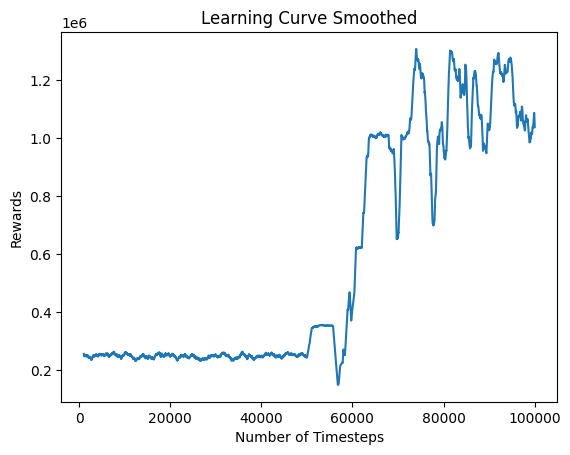

(<stable_baselines3.dqn.dqn.DQN at 0x15ed022c0>,
 <Monitor<MaxNutritionEnv instance>>)

In [11]:
run_with_learning_algorithm(DQN, env, 100000, log_dir, num_meals=21, seed=0)